## Homework 3

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn import linear_model
import random

In [2]:
#prevent scientific notation
np.set_printoptions(suppress = True)

### Exercise 4

Importing the data

In [3]:
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

(a) Plot the data

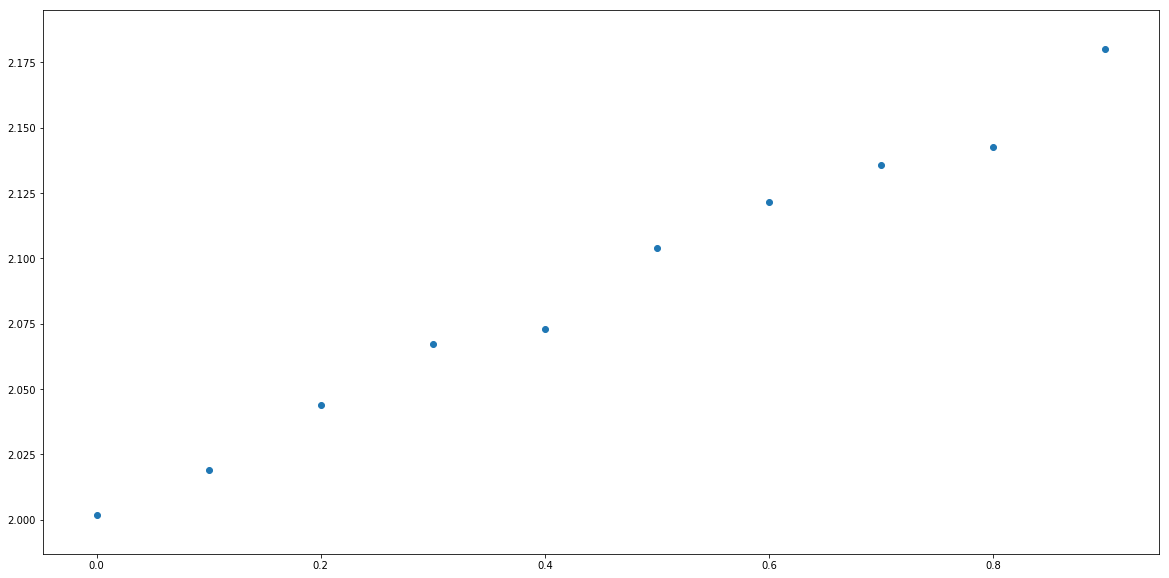

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)

(b) Fit a 8th degree polynomial on the data using the LS estimator and plot the
results (data points and the curve resulting from the fit). Output also the
estimates of the parameters of the polynomial

* Solution using python libraries

In [5]:
p = np.polyfit(X[:,0], y[:,0], 8)
f = np.poly1d(p) 

Orange line is the line of the polynomial and blue dots are the data points given.

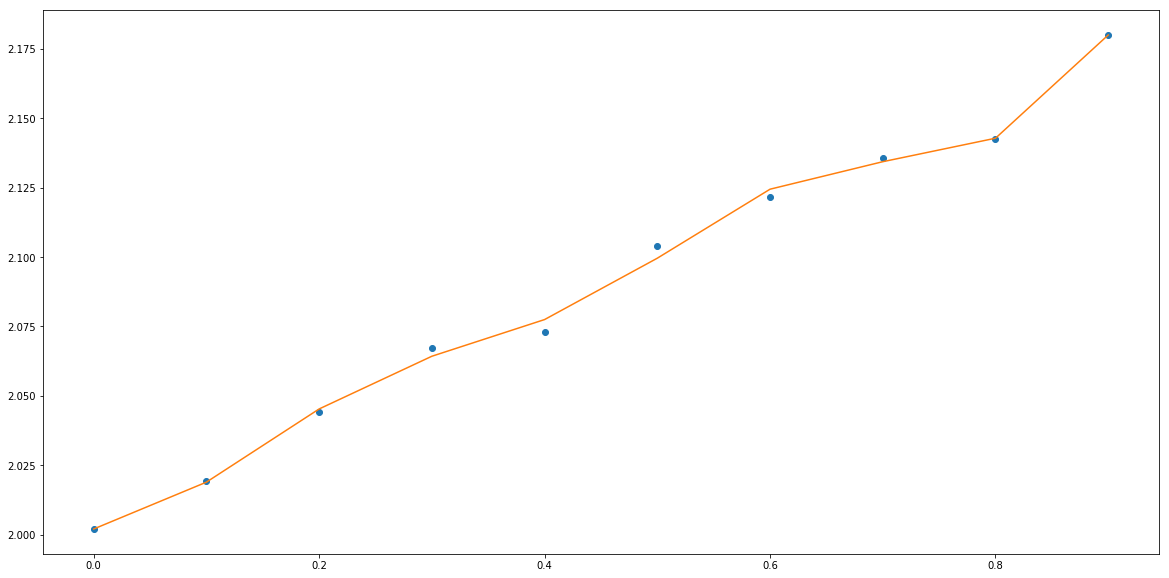

In [6]:
plt.figure(figsize=(20,10))
plt.plot(X, y, "o", X[:,0], f(X[:,0]), "-")

Parameters of the polynomial are:

In [7]:
f

poly1d([-201.45079061,  706.1433619 , -986.59055121,  698.30416313,
       -262.20685696,   49.42056422,   -3.83248362,    0.25940816,
          2.00199165])

* Solution using matrices

In [8]:
#X array
X = np.hstack((np.ones((10, 1)), X, X**2, X**3, X**4, X**5, X**6, X**7, X**8))

In [9]:
## defening the calculation of theta as a function
## function will be used in other exercises too

def theta_calc(X, y, l):
    ## calculation of theta vector

    #transpose matrix
    XT = X.transpose()

    #X transpose multiplied by X
    XTX = XT.dot(X)

    #inverse of XTX+lI
    I = np.identity(len(XTX))
    invXTX = inv(XTX + l*I)

    #theta estimation
    theta_estimated = (invXTX.dot(XT)).dot(y)
    
    return theta_estimated

Calling the theta_calc function with l = 0, in order to get the theta of LS method

In [10]:
theta_estimated = theta_calc(X, y, 0)

In [11]:
y_estimated = (theta_estimated.transpose()).dot(X.transpose()).transpose()

Orange line is the line of the polynomial and blue dots are the data points given.

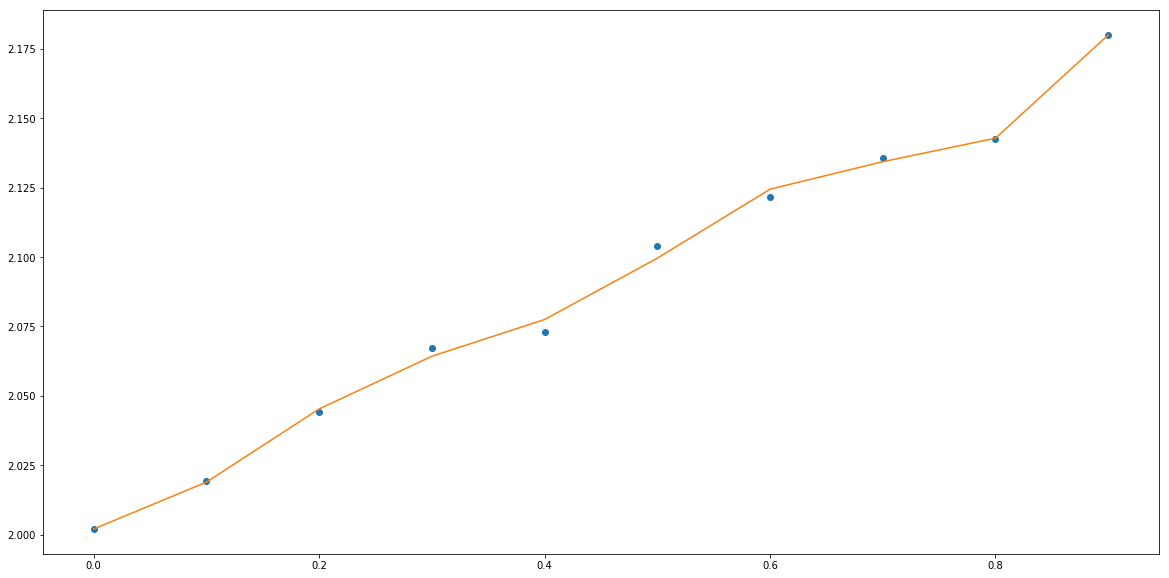

In [12]:
plt.figure(figsize=(20,10))
plt.plot(Training_Set['X'], y, "o", Training_Set['X'][:,0], y_estimated)

Parameters of the polynomial are:

In [13]:
theta_estimated

array([[   2.00199293],
       [   0.25942741],
       [  -3.8326432 ],
       [  49.42152499],
       [-262.21044549],
       [ 698.31214303],
       [-986.60072329],
       [ 706.15024511],
       [-201.45269279]])

(c) Fit a 8th degree polynomial on the data using the ridge regression estimator and
plot the results (data points and the curve resulting from the fit). Output also the
estimates of the parameters of the polynomial. Experiment with various values
of λ

In [14]:
#list of different l values
l_list = np.linspace(0.1, 0.5, 10)

#theta estimations
theta_estimates = []
for l in l_list:
    theta_estimates.append(theta_calc(X, y, l))

On the following diagram, the blue points are the data points given. Each value of λ gives one line. The orange line is for the smallest λ value. The brown line is for the largest.

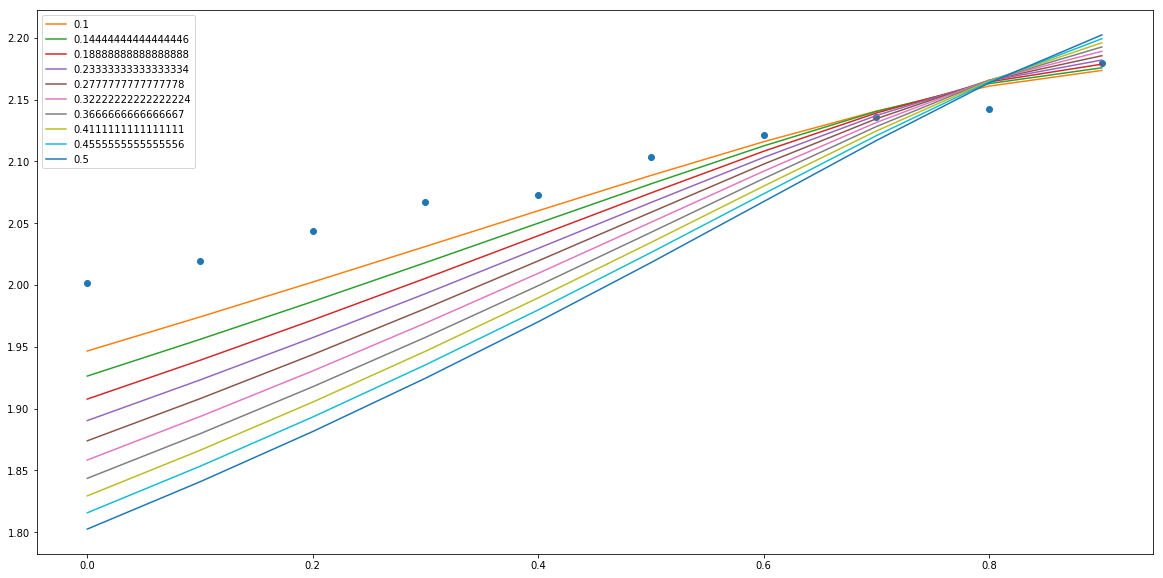

In [15]:
plt.figure(figsize=(20,10))
plt.plot(Training_Set['X'], y, "o")

for i in range(len(theta_estimates)):
    y_estimated = (theta_estimates[i].transpose()).dot(X.transpose()).transpose()
    plt.plot(Training_Set['X'][:,0], y_estimated, label = l_list[i])

plt.legend()


λ values and estimations of theta:

In [16]:
for i in range(len(theta_estimates)):
    print("λ = ", l_list[i], "\ntheta = ",theta_estimates[i][:,0])

λ =  0.1 
theta =  [ 1.94657363  0.27166295  0.04077954 -0.01282617 -0.02248477 -0.02009638
 -0.0147972  -0.00943891 -0.00487436]
λ =  0.14444444444444446 
theta =  [ 1.92628736  0.29157188  0.05309745 -0.00751194 -0.02200229 -0.0227572
 -0.01944627 -0.01529518 -0.01140461]
λ =  0.18888888888888888 
theta =  [ 1.90763921  0.30780584  0.06352435 -0.0025785  -0.02084229 -0.02403085
 -0.02224495 -0.01901317 -0.0156357 ]
λ =  0.23333333333333334 
theta =  [ 1.89025524  0.32130856  0.07262594  0.00213394 -0.01917923 -0.02434802
 -0.02381331 -0.02134685 -0.01840983]
λ =  0.2777777777777778 
theta =  [ 1.87388271  0.3327449   0.08073509  0.0066748  -0.0171645  -0.02399603
 -0.0245281  -0.02272887 -0.02019096]
λ =  0.32222222222222224 
theta =  [ 1.85834504  0.34258106  0.08806721  0.01106262 -0.01490995 -0.02316928
 -0.02463414 -0.02343273 -0.02126627]
λ =  0.3666666666666667 
theta =  [ 1.84351443  0.3511503   0.09477045  0.01530597 -0.01249609 -0.02200254
 -0.02429779 -0.02364154 -0.0218257

(d) Fit a 8th degree polynomial on the data using the lasso estimator and plot the
results (data points and the curve resulting from the fit). Output also the
estimates of the parameters of the polynomial. Experiment with various values
of λ

In [17]:
#list of different a values
alpha_list = np.linspace(0.0001, 0.005, 5)

In [18]:
theta_estimates = []
for  a in alpha_list:
    clf = linear_model.Lasso(alpha = a, fit_intercept = False)
    clf.fit(X, y)
    theta_estimates.append(clf.coef_)

On the following diagram, the blue points are the data points given. Each value of α gives one line. The orange line is for the smallest α value. The brown line is for the largest.

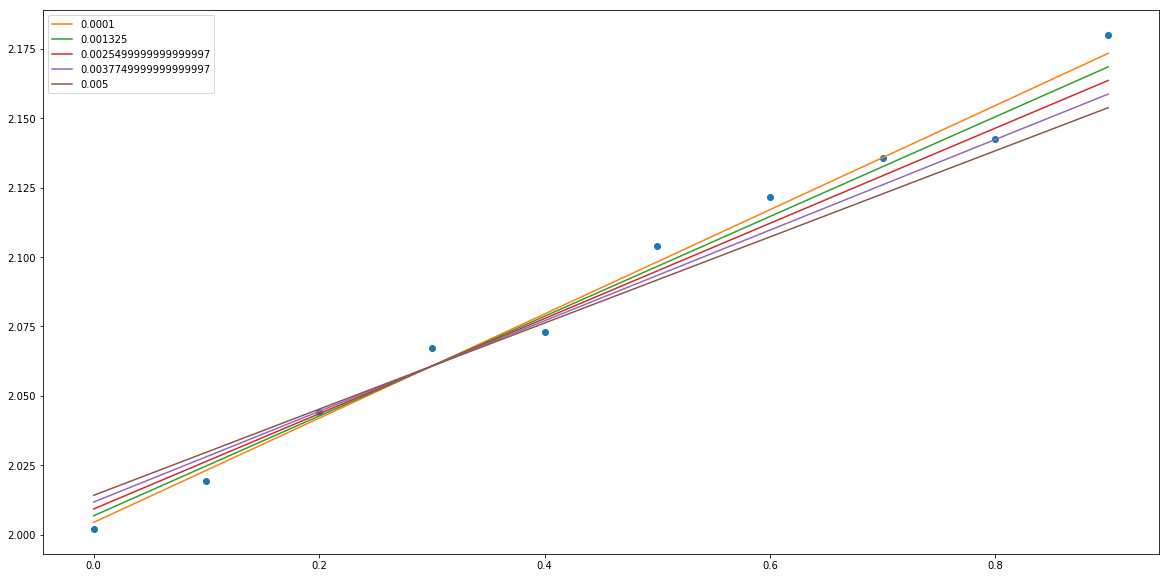

In [19]:
plt.figure(figsize=(20,10))
plt.plot(Training_Set['X'], y, "o")

for i in range(len(theta_estimates)):
    y_estimated = (theta_estimates[i].transpose()).dot(X.transpose()).transpose()
    plt.plot(Training_Set['X'][:,0], y_estimated, label = alpha_list[i])

plt.legend()


In [20]:
for i in range(len(theta_estimates)):
    print("α = ", alpha_list[i], "\ntheta = ", theta_estimates[i])

α =  0.0001 
theta =  [ 2.00436814  0.18781186  0.         -0.          0.          0.
  0.          0.          0.        ]
α =  0.001325 
theta =  [2.00676565 0.17972806 0.         0.         0.         0.
 0.         0.         0.        ]
α =  0.0025499999999999997 
theta =  [2.00920876 0.17157227 0.         0.         0.         0.
 0.         0.         0.        ]
α =  0.0037749999999999997 
theta =  [2.01169721 0.16334491 0.         0.         0.         0.
 0.         0.         0.        ]
α =  0.005 
theta =  [2.01412922 0.15520664 0.         0.         0.         0.
 0.         0.         0.        ]


(e) Discuss briefly on the results

The data points given where generated by a linear model. Then there was noise added. But which method gave the closest to the real model?

* The LS method gives parameters that make the function follow perfectly the observations. That indicates that our model is overfitting. 
* The Lasso method depicts a linear relationship between the independent and the dependent variables, since the only non zero parameters are the error (intercept) and the first degeree polynomial.
* Similarly, the ridge regression method sets most parameters close to zero and gives a more linear look to the model.

In conclusion, the methods that penaltize overfit gave models closer to the one that generated the data.

### Exercise 5

(a) Generate 𝑑 = 50 data sets

Each set has 30 (x, y) pairs

Noise is added to the y's

In [21]:
np.random.seed(10)

X = []
y = []

#Define the the model
def f(X):
    return 2*X

#Generate 50 sets of data
#Each set has 30 pairs of x's and y's
#Noise is added to each y
for i in range(50):
    X.append(np.random.normal(0, np.sqrt(64), 30))
    y.append(f(X[i]) + np.random.normal(0, np.sqrt(64), 30))


Plotting 5 data sets

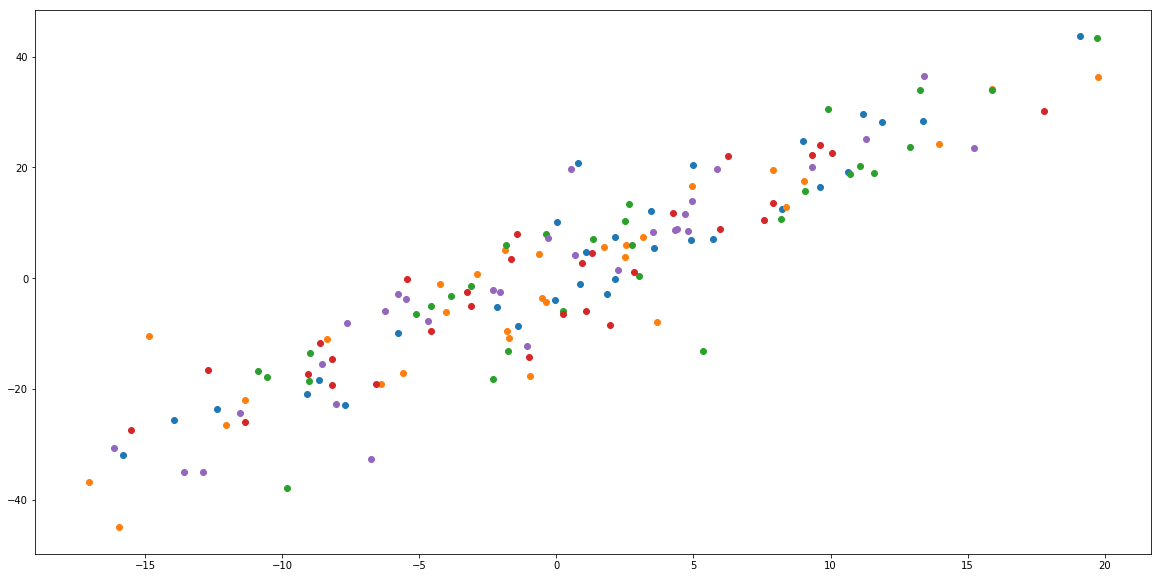

In [22]:
plt.figure(figsize=(20,10))
for i in range(5):
    plt.scatter(X[i], y[i])

(b) Compute the LS linear estimates of $\theta_0$

In [23]:
theta = []

#using function from exercise 4 to calculate theta
#l is obviously set to 0

for i in range(len(X)):
    theta.append(theta_calc(X[i].reshape((30,1)), y[i], 0))
   

In [24]:
#printing theta values
for i in range(len(theta)):
    print("θ", i+1, "=", theta[i][0].round(2))

θ 1 = 2.15
θ 2 = 1.95
θ 3 = 2.02
θ 4 = 1.85
θ 5 = 2.18
θ 6 = 2.03
θ 7 = 2.03
θ 8 = 2.34
θ 9 = 1.92
θ 10 = 1.88
θ 11 = 2.1
θ 12 = 1.49
θ 13 = 2.07
θ 14 = 2.17
θ 15 = 2.09
θ 16 = 2.38
θ 17 = 2.09
θ 18 = 1.79
θ 19 = 2.17
θ 20 = 1.67
θ 21 = 1.61
θ 22 = 1.83
θ 23 = 2.38
θ 24 = 2.0
θ 25 = 1.68
θ 26 = 1.9
θ 27 = 1.93
θ 28 = 2.11
θ 29 = 1.83
θ 30 = 1.98
θ 31 = 2.25
θ 32 = 2.38
θ 33 = 2.12
θ 34 = 1.85
θ 35 = 1.93
θ 36 = 1.94
θ 37 = 2.16
θ 38 = 1.69
θ 39 = 2.04
θ 40 = 2.0
θ 41 = 1.91
θ 42 = 1.83
θ 43 = 1.94
θ 44 = 2.15
θ 45 = 2.12
θ 46 = 1.77
θ 47 = 2.15
θ 48 = 2.24
θ 49 = 2.02
θ 50 = 1.97


(c1) compute the MSE

In [25]:
mse = 0

for theta_i in theta:
    mse += (1/50)*(theta_i[0]-2)**2

In [26]:
mse

0.03868223405710345

(c2) depict graphically the values θ and comment on how they are spread around $\theta_0$.

In [27]:
t=[]
for i in theta:
    t.append(i[0])

(array([ 2.,  4., 11., 14., 13.,  6.]),
 array([1.48547674, 1.63454565, 1.78361456, 1.93268347, 2.08175238,
        2.23082129, 2.3798902 ]),
 <a list of 6 Patch objects>)

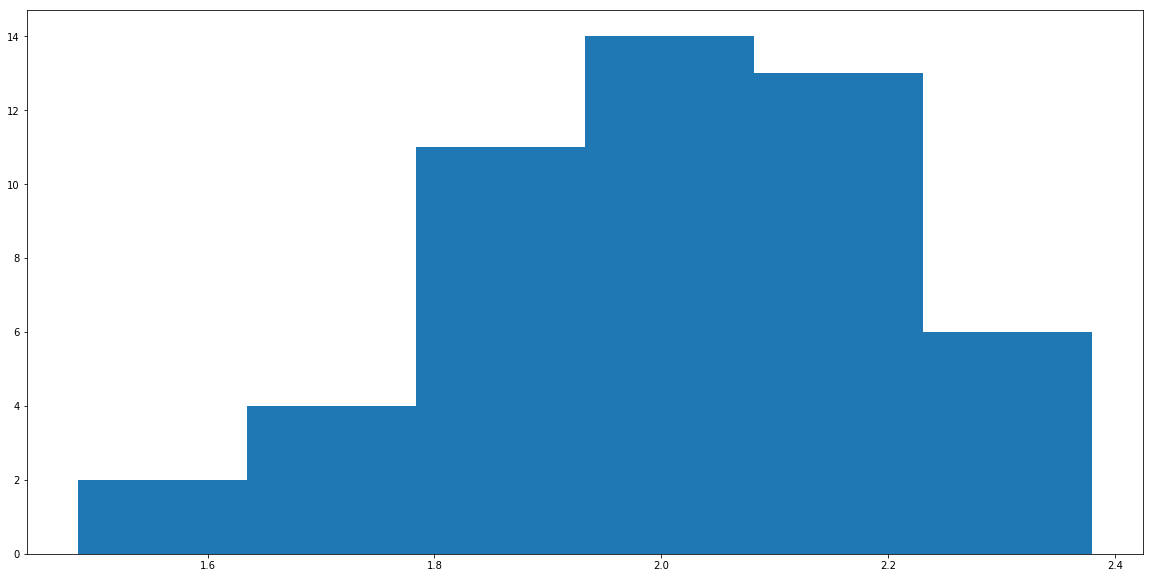

In [28]:
plt.figure(figsize=(20,10))
plt.hist(t,  bins = 6)

Estimations of θ spread normally around the real value $\theta_0$. Thus, we could say that their mean would give an accurate estimation of theta's true value.

### Exercise 6

Create list of different λ values.

In [29]:
l = np.arange(0, 10000.1, 0.1).round(1).tolist()

Generate data. 50 samples of 30 observations.

In [30]:
np.random.seed(10)

X = []
y = []

#Define the the model
def f(X):
    return 2*X

#Generate 50 sets of data
#Each set has 30 pairs of x's and y's
#Noise is added to each y
for i in range(50):
    X.append(np.random.normal(0, np.sqrt(64), 30))
    y.append(f(X[i]) + np.random.normal(0, np.sqrt(64), 30))

Compute theta for each λ value.

In [31]:
theta = []

#using function from exercise 4 to calculate theta
#calculate theta for each l value

for j in range(len(l)):
    theta.append([])
    for i in range(len(X)):
        theta[j].append(theta_calc(X[i].reshape((30,1)), y[i], l[j]))

Compute MSE for each λ value

In [32]:
mse = []
mse_temp = 0

for t in theta:
    for theta_i in t:
        mse_temp += (1/50)*(theta_i-2)**2
    mse.append(mse_temp)
    mse_temp = 0

Plot MSE vs λ

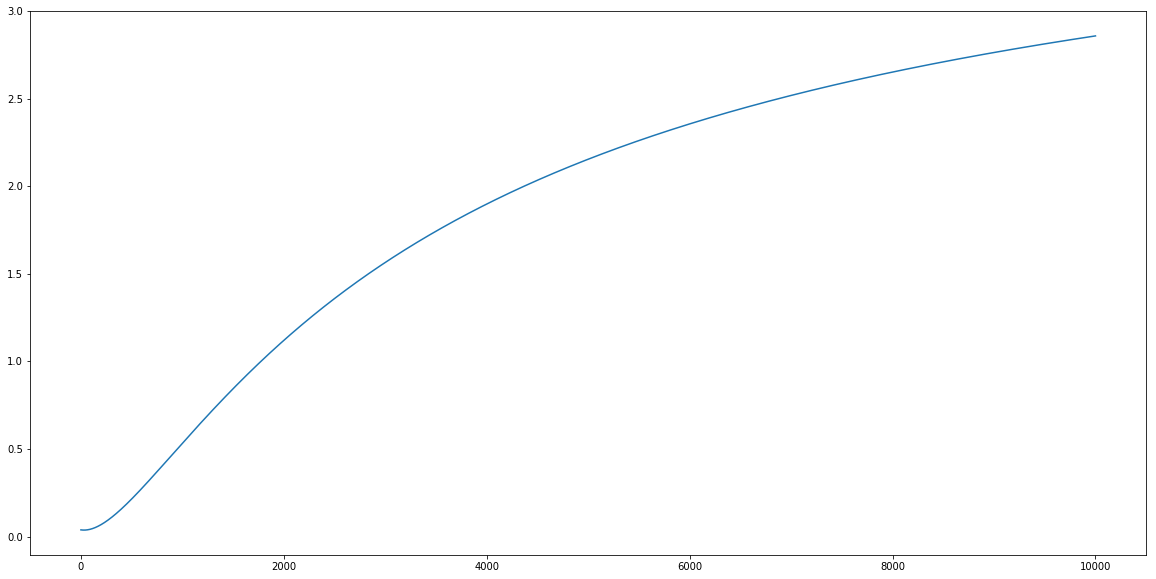

In [33]:
plt.figure(figsize=(20,10))
plt.plot(l, mse)

Find the range of λ that gives smaller mse than the LS method

In [34]:
l_min = 0
l_max = 0

for i in range(len(l)):
    if(mse[i] < 0.0386822340):
        l_min = l[i]
        break;

for i in reversed(range(len(l))):
    if(mse[i] < 0.0386822340):
        l_max = l[i]
        break;        

In [35]:
print("Minimum value for λ in order for mse to be less than the mse of LS method is:", l_min, 
      "\nMaximum value for λ is:", l_max)

Minimum value for λ in order for mse to be less than the mse of LS method is: 0.1 
Maximum value for λ is: 60.8


As we can see, in ridge regression there is a range of parameter λ that gives better MSE than the LS method. Obviously, when going closer to 0 the model overfits. As λ gets larger model overfits less. Nonetheless, there is a point that the regularization parameter gives such a penalty that it stops producing small MSE's.